In [2]:
import numpy as np
import tensorflow as tf
tf.random.set_seed(55)
import matplotlib.pyplot as plt

In [3]:
mnist = tf.keras.datasets.mnist

# 0. Data preprocessing
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [4]:
# 1. learning rate = 0.5, 0.1, 0.01
# 2. activation function = reLU
# 3. loss function = sparse_categorical_crossentropy
# to prevent overfitting :
    # 4. drop out = 0.2, 0.5
    # 5. l2    

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 26us/sample - loss: 0.2733 - accuracy: 0.9199
Epoch 2/10
60000/60000 [==============================] - 1s 20us/sample - loss: 0.1115 - accuracy: 0.9675
Epoch 3/10
60000/60000 [==============================] - 1s 19us/sample - loss: 0.0760 - accuracy: 0.9776
Epoch 4/10
60000/60000 [==============================] - 1s 20us/sample - loss: 0.0573 - accuracy: 0.9839
Epoch 5/10
60000/60000 [==============================] - 1s 20us/sample - loss: 0.0450 - accuracy: 0.9873
Epoch 6/10
60000/60000 [==============================] - 1s 19us/sample - loss: 0.0353 - accuracy: 0.9902
Epoch 7/10
60000/60000 [==============================] - 1s 19us/sample - loss: 0.0282 - accuracy: 0.9926
Epoch 8/10
60000/60000 [==============================] - 1s 19us/sample - loss: 0.0227 - accuracy: 0.9945
Epoch 9/10
60000/60000 [==============================] - 1s 19us/sample - loss: 0.0185 - accuracy: 0.9960
Epoch 10/10
60

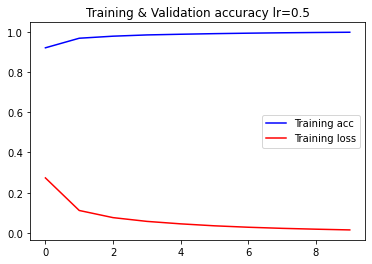

In [5]:
# Model1 : lr = 0.5

# 1. Model Design
model1 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(), # input data transform: 1D array
  tf.keras.layers.Dense(512, activation='relu'), # set activation function
#   tf.keras.layers.Dropout(0.2), # set dropout
  tf.keras.layers.Dense(10, activation='softmax'), # set output layer

])

optimizer1 = tf.keras.optimizers.SGD(learning_rate=0.5)

# 2. Model Compile
model1.compile(optimizer=optimizer1, # set optimizer 
              loss='sparse_categorical_crossentropy', # set loss function
              metrics=['accuracy'] # set metrics to monitor
              ) 
# 3. Model fit
history1 = model1.fit(x_train, y_train, epochs=10, batch_size=128) # training

acc1 = history1.history['accuracy']
loss1 = history1.history['loss']
epochs1 = range(len(acc1))

plt.plot(epochs1, acc1, 'b', label='Training acc')
plt.plot(epochs1, loss1, 'r', label='Training loss')
plt.title('Training & Validation accuracy lr=0.5')
plt.legend()
plt.show()

# 4. Model evaluation
eval1_train=model1.evaluate(x_train, y_train, verbose=0)
eval1_test=model1.evaluate(x_test, y_test, verbose=0)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 34us/sample - loss: 1.6132 - accuracy: 0.8881
Epoch 2/10
60000/60000 [==============================] - 2s 29us/sample - loss: 0.4214 - accuracy: 0.9207
Epoch 3/10
60000/60000 [==============================] - 1s 25us/sample - loss: 0.4121 - accuracy: 0.9228
Epoch 4/10
60000/60000 [==============================] - 1s 24us/sample - loss: 0.3842 - accuracy: 0.9299
Epoch 5/10
60000/60000 [==============================] - 1s 24us/sample - loss: 0.3775 - accuracy: 0.9320
Epoch 6/10
60000/60000 [==============================] - 1s 23us/sample - loss: 0.3970 - accuracy: 0.9285
Epoch 7/10
60000/60000 [==============================] - 2s 26us/sample - loss: 0.4698 - accuracy: 0.9200
Epoch 8/10
60000/60000 [==============================] - 1s 24us/sample - loss: 0.4090 - accuracy: 0.9266
Epoch 9/10
60000/60000 [==============================] - 1s 24us/sample - loss: 0.4677 - accuracy: 0.9218
Epoch 10/10
60

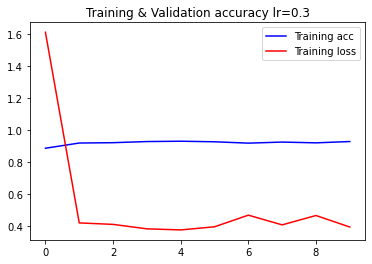

In [6]:
# Model2 : lr = 0.3


# 1. Model Design
model2 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(), # input data transform: 1D array
  tf.keras.layers.Dense(512, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)), # set activation function
#   tf.keras.layers.Dropout(0.2), # set dropout
  tf.keras.layers.Dense(10, activation='softmax'), # set output layer

])

optimizer2 = tf.keras.optimizers.SGD(learning_rate=0.3)

# 2. Model Compile
model2.compile(optimizer=optimizer2, # set optimizer 
              loss='sparse_categorical_crossentropy', # set loss function
              metrics=['accuracy'] # set metrics to monitor
              ) 
# 3. Model fit
history2 = model2.fit(x_train, y_train, epochs=10, batch_size=128) # training

acc2 = history2.history['accuracy']
loss2 = history2.history['loss']
epochs2 = range(len(acc2))

plt.plot(epochs2, acc2, 'b', label='Training acc')
plt.plot(epochs2, loss2, 'r', label='Training loss')
plt.title('Training & Validation accuracy lr=0.3')
plt.legend()
plt.show()

# 4. Model evaluation
eval2_train=model2.evaluate(x_train, y_train, verbose=0)
eval2_test=model2.evaluate(x_test, y_test, verbose=0)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 27us/sample - loss: 0.4382 - accuracy: 0.8847
Epoch 2/10
60000/60000 [==============================] - 1s 21us/sample - loss: 0.2451 - accuracy: 0.9314
Epoch 3/10
60000/60000 [==============================] - 1s 21us/sample - loss: 0.1938 - accuracy: 0.9462
Epoch 4/10
60000/60000 [==============================] - 1s 20us/sample - loss: 0.1615 - accuracy: 0.9546
Epoch 5/10
60000/60000 [==============================] - 1s 19us/sample - loss: 0.1379 - accuracy: 0.9622
Epoch 6/10
60000/60000 [==============================] - 1s 19us/sample - loss: 0.1206 - accuracy: 0.9666
Epoch 7/10
60000/60000 [==============================] - 1s 19us/sample - loss: 0.1074 - accuracy: 0.9699
Epoch 8/10
60000/60000 [==============================] - 1s 20us/sample - loss: 0.0966 - accuracy: 0.9735
Epoch 9/10
60000/60000 [==============================] - 1s 20us/sample - loss: 0.0877 - accuracy: 0.9761
Epoch 10/10
60

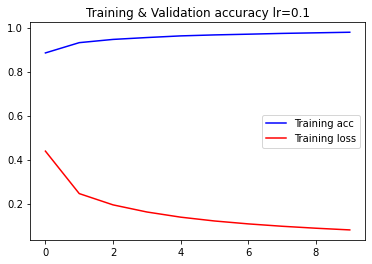

In [7]:
# Model3 : lr = 0.1

# 1. Model Design
model3 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(), # input data transform: 1D array
  tf.keras.layers.Dense(512, activation='relu'), # set activation function
#   tf.keras.layers.Dropout(0.2), # set dropout
  tf.keras.layers.Dense(10, activation='softmax'), # set output layer

])

optimizer3 = tf.keras.optimizers.SGD(learning_rate=0.1)

# 2. Model Compile
model3.compile(optimizer=optimizer3, # set optimizer 
              loss='sparse_categorical_crossentropy', # set loss function
              metrics=['accuracy'] # set metrics to monitor
              ) 
# 3. Model fit
history3 = model3.fit(x_train, y_train, epochs=10, batch_size=128) # training

acc3 = history3.history['accuracy']
loss3 = history3.history['loss']
epochs3 = range(len(acc3))

plt.plot(epochs3, acc3, 'b', label='Training acc')
plt.plot(epochs3, loss3, 'r', label='Training loss')
plt.title('Training & Validation accuracy lr=0.1')
plt.legend()
plt.show()

# 4. Model evaluation
eval3_train=model3.evaluate(x_train, y_train, verbose=0)
eval3_test=model3.evaluate(x_test, y_test, verbose=0)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 1s 23us/sample - loss: 0.5596 - accuracy: 0.8625
Epoch 2/10
60000/60000 [==============================] - 1s 21us/sample - loss: 0.3013 - accuracy: 0.9160
Epoch 3/10
60000/60000 [==============================] - 1s 19us/sample - loss: 0.2534 - accuracy: 0.9290
Epoch 4/10
60000/60000 [==============================] - 1s 20us/sample - loss: 0.2226 - accuracy: 0.9379
Epoch 5/10
60000/60000 [==============================] - 1s 20us/sample - loss: 0.1992 - accuracy: 0.9444
Epoch 6/10
60000/60000 [==============================] - 1s 19us/sample - loss: 0.1807 - accuracy: 0.9492
Epoch 7/10
60000/60000 [==============================] - 1s 19us/sample - loss: 0.1654 - accuracy: 0.9544
Epoch 8/10
60000/60000 [==============================] - 1s 20us/sample - loss: 0.1525 - accuracy: 0.9577
Epoch 9/10
60000/60000 [==============================] - 1s 20us/sample - loss: 0.1415 - accuracy: 0.9610
Epoch 10/10
60

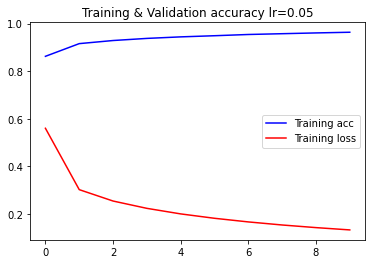

In [8]:
# Model4 : lr = 0.05

# 1. Model Design
model4 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(), # input data transform: 1D array
  tf.keras.layers.Dense(512, activation='relu'), # set activation function
#   tf.keras.layers.Dropout(0.2), # set dropout
  tf.keras.layers.Dense(10, activation='softmax'), # set output layer

])

optimizer4 = tf.keras.optimizers.SGD(learning_rate=0.05)

# 2. Model Compile
model4.compile(optimizer=optimizer4, # set optimizer 
              loss='sparse_categorical_crossentropy', # set loss function
              metrics=['accuracy'] # set metrics to monitor
              ) 
# 3. Model fit
history4 = model4.fit(x_train, y_train, epochs=10, batch_size=128) # training

acc4 = history4.history['accuracy']
loss4 = history4.history['loss']
epochs4 = range(len(acc4))

plt.plot(epochs4, acc4, 'b', label='Training acc')
plt.plot(epochs4, loss4, 'r', label='Training loss')
plt.title('Training & Validation accuracy lr=0.05')
plt.legend()
plt.show()

# 4. Model evaluation
eval4_train=model4.evaluate(x_train, y_train, verbose=0)
eval4_test=model4.evaluate(x_test, y_test, verbose=0)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 1s 21us/sample - loss: 1.1070 - accuracy: 0.7535
Epoch 2/10
60000/60000 [==============================] - 1s 22us/sample - loss: 0.5269 - accuracy: 0.8719
Epoch 3/10
60000/60000 [==============================] - 1s 22us/sample - loss: 0.4248 - accuracy: 0.8892
Epoch 4/10
60000/60000 [==============================] - 1s 21us/sample - loss: 0.3783 - accuracy: 0.8985
Epoch 5/10
60000/60000 [==============================] - 1s 21us/sample - loss: 0.3496 - accuracy: 0.9040
Epoch 6/10
60000/60000 [==============================] - 1s 20us/sample - loss: 0.3293 - accuracy: 0.9091
Epoch 7/10
60000/60000 [==============================] - 1s 20us/sample - loss: 0.3135 - accuracy: 0.9132
Epoch 8/10
60000/60000 [==============================] - 1s 21us/sample - loss: 0.3004 - accuracy: 0.9168
Epoch 9/10
60000/60000 [==============================] - 1s 20us/sample - loss: 0.2890 - accuracy: 0.9196
Epoch 10/10
60

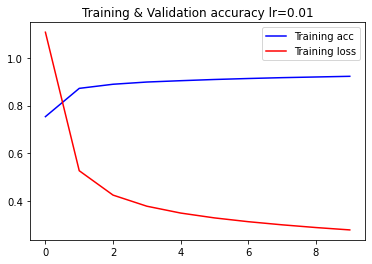

In [9]:
# Model53 : lr = 0.01

# 1. Model Design
model5 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(), # input data transform: 1D array
  tf.keras.layers.Dense(512, activation='relu'), # set activation function
#   tf.keras.layers.Dropout(0.2), # set dropout
  tf.keras.layers.Dense(10, activation='softmax'), # set output layer

])

optimizer5 = tf.keras.optimizers.SGD(learning_rate=0.01)

# 2. Model Compile
model5.compile(optimizer=optimizer5, # set optimizer 
              loss='sparse_categorical_crossentropy', # set loss function
              metrics=['accuracy'] # set metrics to monitor
              ) 
# 3. Model fit
history5 = model5.fit(x_train, y_train, epochs=10, batch_size=128) # training

acc5 = history5.history['accuracy']
loss5 = history5.history['loss']
epochs5 = range(len(acc5))

plt.plot(epochs5, acc5, 'b', label='Training acc')
plt.plot(epochs5, loss5, 'r', label='Training loss')
plt.title('Training & Validation accuracy lr=0.01')
plt.legend()
plt.show()

# 4. Model evaluation
eval5_train=model5.evaluate(x_train, y_train, verbose=0)
eval5_test=model5.evaluate(x_test, y_test, verbose=0)

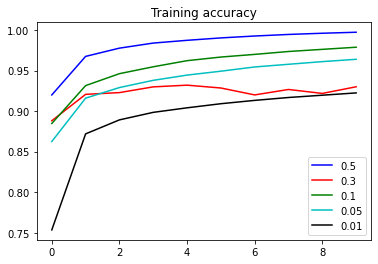

In [10]:
plt.plot(epochs1, acc1, 'b', label='0.5')
plt.plot(epochs2, acc2, 'r', label='0.3')
plt.plot(epochs3, acc3, 'g', label='0.1')
plt.plot(epochs4, acc4, 'c', label='0.05')
plt.plot(epochs5, acc5, 'k', label='0.01')
plt.title('Training accuracy')
plt.legend()
plt.show()

In [11]:
import pandas as pd

data = [['0.5', eval1_train[1], eval1_test[1]],
        ['0.3', eval2_train[1], eval2_test[1]],
        ['0.1', eval3_train[1], eval3_test[1]],
        ['0.05', eval4_train[1], eval4_test[1]],
        ['0.01', eval5_train[1], eval5_test[1]]
       ]
        
df=pd.DataFrame(data, columns= ['learning rate','Training accuracy', 'Test accuracy'])
print(df)

  learning rate  Training accuracy  Test accuracy
0           0.5           0.998400         0.9825
1           0.3           0.935017         0.9351
2           0.1           0.980650         0.9726
3          0.05           0.965783         0.9612
4          0.01           0.924017         0.9260


Train on 60000 samples
Epoch 1/30
60000/60000 [==============================] - 2s 26us/sample - loss: 0.2901 - accuracy: 0.9141
Epoch 2/30
60000/60000 [==============================] - 1s 24us/sample - loss: 0.1263 - accuracy: 0.9636
Epoch 3/30
60000/60000 [==============================] - 2s 26us/sample - loss: 0.0899 - accuracy: 0.9728
Epoch 4/30
60000/60000 [==============================] - 2s 25us/sample - loss: 0.0726 - accuracy: 0.9787
Epoch 5/30
60000/60000 [==============================] - 1s 24us/sample - loss: 0.0612 - accuracy: 0.9820
Epoch 6/30
60000/60000 [==============================] - 1s 23us/sample - loss: 0.0490 - accuracy: 0.9852
Epoch 7/30
60000/60000 [==============================] - 1s 23us/sample - loss: 0.0435 - accuracy: 0.9873
Epoch 8/30
60000/60000 [==============================] - 1s 24us/sample - loss: 0.0368 - accuracy: 0.9890
Epoch 9/30
60000/60000 [==============================] - 1s 24us/sample - loss: 0.0329 - accuracy: 0.9899
Epoch 10/30
60

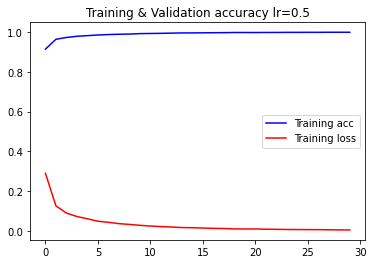

[0.0016009220173769183, 0.99993336] [0.056606346476424735, 0.9839]
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          multiple                  0         
_________________________________________________________________
dense_10 (Dense)             multiple                  401920    
_________________________________________________________________
dropout (Dropout)            multiple                  0         
_________________________________________________________________
dense_11 (Dense)             multiple                  5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [12]:
#best1
# Model1 : lr = 0.5, dropout = 0.2, epoch = 30

# 1. Model Design
model1 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(), # input data transform: 1D array
  tf.keras.layers.Dense(512, activation='relu'), # set activation function
  tf.keras.layers.Dropout(0.2), # set dropout
  tf.keras.layers.Dense(10, activation='softmax'), # set output layer

])

optimizer1 = tf.keras.optimizers.SGD(learning_rate=0.5)

# 2. Model Compile
model1.compile(optimizer=optimizer1, # set optimizer 
              loss='sparse_categorical_crossentropy', # set loss function
              metrics=['accuracy'] # set metrics to monitor
              ) 
# 3. Model fit
history1 = model1.fit(x_train, y_train, epochs=30, batch_size=128) # training

acc1 = history1.history['accuracy']
loss1 = history1.history['loss']
epochs1 = range(len(acc1))

plt.plot(epochs1, acc1, 'b', label='Training acc')
plt.plot(epochs1, loss1, 'r', label='Training loss')
plt.title('Training & Validation accuracy lr=0.5')
plt.legend()
plt.show()

# 4. Model evaluation
eval1_train=model1.evaluate(x_train, y_train, verbose=0)
eval1_test=model1.evaluate(x_test, y_test, verbose=0)
print(eval1_train, eval1_test)

model1.summary()

In [16]:
# learning_rate 조절하는 법 추가
# 또?.?

# 조절하는 파라미터 또는 하이퍼파라미터
# 1. learning rate
# 2. activation function, momentum
# 3. lossfunction
# 4. Regularization
# 4-1. L2, L1
# 4-2. Dropout
# 4-3. Data augmentation
# 5. Early stop
# 6. Weight/bias initialization
# 7. Hidden layer num, node num

Train on 60000 samples
Epoch 1/15
60000/60000 [==============================] - 2s 27us/sample - loss: 0.2901 - accuracy: 0.9138
Epoch 2/15
60000/60000 [==============================] - 1s 25us/sample - loss: 0.1280 - accuracy: 0.9621
Epoch 3/15
60000/60000 [==============================] - 1s 24us/sample - loss: 0.0914 - accuracy: 0.9726
Epoch 4/15
60000/60000 [==============================] - 1s 23us/sample - loss: 0.0720 - accuracy: 0.9785
Epoch 5/15
60000/60000 [==============================] - 1s 24us/sample - loss: 0.0606 - accuracy: 0.9820
Epoch 6/15
60000/60000 [==============================] - 1s 24us/sample - loss: 0.0495 - accuracy: 0.9852
Epoch 7/15
60000/60000 [==============================] - 1s 25us/sample - loss: 0.0436 - accuracy: 0.9872
Epoch 8/15
60000/60000 [==============================] - 1s 25us/sample - loss: 0.0369 - accuracy: 0.9893
Epoch 9/15
60000/60000 [==============================] - 2s 29us/sample - loss: 0.0322 - accuracy: 0.9904
Epoch 10/15
60

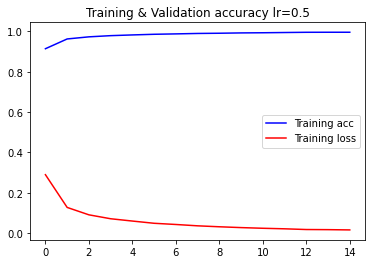

[0.00890445350309407, 0.9986167] [0.05525936975964578, 0.9841]
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          multiple                  0         
_________________________________________________________________
dense_12 (Dense)             multiple                  401920    
_________________________________________________________________
dropout_1 (Dropout)          multiple                  0         
_________________________________________________________________
dense_13 (Dense)             multiple                  5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [14]:
#best2
# Model1 : lr = 0.5, dropout = 0.2, epoch = 15

# 1. Model Design
model1 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(), # input data transform: 1D array
  tf.keras.layers.Dense(512, activation='relu'), # set activation function
  tf.keras.layers.Dropout(0.2), # set dropout
  tf.keras.layers.Dense(10, activation='softmax'), # set output layer

])

optimizer1 = tf.keras.optimizers.SGD(learning_rate=0.5)

# 2. Model Compile
model1.compile(optimizer=optimizer1, # set optimizer 
              loss='sparse_categorical_crossentropy', # set loss function
              metrics=['accuracy'] # set metrics to monitor
              ) 
# 3. Model fit
history1 = model1.fit(x_train, y_train, epochs=15, batch_size=128) # training

acc1 = history1.history['accuracy']
loss1 = history1.history['loss']
epochs1 = range(len(acc1))

plt.plot(epochs1, acc1, 'b', label='Training acc')
plt.plot(epochs1, loss1, 'r', label='Training loss')
plt.title('Training & Validation accuracy lr=0.5')
plt.legend()
plt.show()

# 4. Model evaluation
eval1_train=model1.evaluate(x_train, y_train, verbose=0)
eval1_test=model1.evaluate(x_test, y_test, verbose=0)
print(eval1_train, eval1_test)

model1.summary()

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 29us/sample - loss: 0.2877 - accuracy: 0.9148
Epoch 2/10
60000/60000 [==============================] - 2s 27us/sample - loss: 0.1256 - accuracy: 0.9633
Epoch 3/10
60000/60000 [==============================] - 2s 26us/sample - loss: 0.0900 - accuracy: 0.9730
Epoch 4/10
60000/60000 [==============================] - 2s 26us/sample - loss: 0.0722 - accuracy: 0.9787
Epoch 5/10
60000/60000 [==============================] - 2s 26us/sample - loss: 0.0596 - accuracy: 0.9828
Epoch 6/10
60000/60000 [==============================] - 1s 24us/sample - loss: 0.0496 - accuracy: 0.9853
Epoch 7/10
60000/60000 [==============================] - 1s 24us/sample - loss: 0.0423 - accuracy: 0.9875
Epoch 8/10
60000/60000 [==============================] - 1s 24us/sample - loss: 0.0368 - accuracy: 0.9893
Epoch 9/10
60000/60000 [==============================] - 1s 24us/sample - loss: 0.0314 - accuracy: 0.9906
Epoch 10/10
60

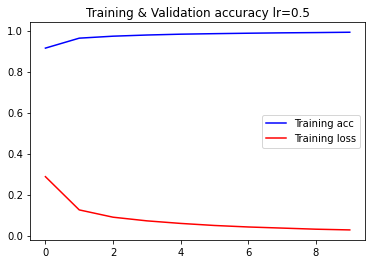

[0.017399295339155164, 0.99591666] [0.05723292792573338, 0.9819]
Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_7 (Flatten)          multiple                  0         
_________________________________________________________________
dense_14 (Dense)             multiple                  401920    
_________________________________________________________________
dropout_2 (Dropout)          multiple                  0         
_________________________________________________________________
dense_15 (Dense)             multiple                  5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [15]:
#best3
# Model1 : lr = 0.5, dropout = 0.2, epoch = 10

# 1. Model Design
model1 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(), # input data transform: 1D array
  tf.keras.layers.Dense(512, activation='relu'), # set activation function
  tf.keras.layers.Dropout(0.2), # set dropout
  tf.keras.layers.Dense(10, activation='softmax'), # set output layer

])

optimizer1 = tf.keras.optimizers.SGD(learning_rate=0.5)

# 2. Model Compile
model1.compile(optimizer=optimizer1, # set optimizer 
              loss='sparse_categorical_crossentropy', # set loss function
              metrics=['accuracy'] # set metrics to monitor
              ) 
# 3. Model fit
history1 = model1.fit(x_train, y_train, epochs=10, batch_size=128) # training

acc1 = history1.history['accuracy']
loss1 = history1.history['loss']
epochs1 = range(len(acc1))

plt.plot(epochs1, acc1, 'b', label='Training acc')
plt.plot(epochs1, loss1, 'r', label='Training loss')
plt.title('Training & Validation accuracy lr=0.5')
plt.legend()
plt.show()

# 4. Model evaluation
eval1_train=model1.evaluate(x_train, y_train, verbose=0)
eval1_test=model1.evaluate(x_test, y_test, verbose=0)
print(eval1_train, eval1_test)

model1.summary()